In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

pc_dataset = pd.read_csv("../data/PC_modelData10K.csv")
pc_dataset.head()

,Unnamed: 0,Issue_Time,Color,Make,Route,Fine_Amount,Binned
0,149410,1041.0,GY,BMW,00495,63.0,4
1,4470008,156.0,SI,TOYO,00403,25.0,1
2,3940756,715.0,BK,HYUN,00500,25.0,1
3,4168751,2205.0,SL,HOND,00600,68.0,4
4,5043602,1329.0,SL,LEXS,360R1,58.0,3


In [3]:
# Dropping an column not needed 
print('Number of columns before:{}'.format(len(pc_dataset.columns)))
pc_dataset.drop('Unnamed: 0', axis=1, inplace=True)
print('Number of columns after :{}'.format(len(pc_dataset.columns)))
pc_dataset.head()

Number of columns before:7
Number of columns after :6


,Issue_Time,Color,Make,Route,Fine_Amount,Binned
0,1041.0,GY,BMW,00495,63.0,4
1,156.0,SI,TOYO,00403,25.0,1
2,715.0,BK,HYUN,00500,25.0,1
3,2205.0,SL,HOND,00600,68.0,4
4,1329.0,SL,LEXS,360R1,58.0,3


In [4]:
# Temporarily removing Issue_time from model.
pc_dataset = pc_dataset[["Color", "Make", "Route", "Fine_Amount", "Binned"]]
pc_dataset.shape

(10000, 5)

In [5]:
# Predicting the "Fine Amount" based on the Color", "Make", "Route"

Col = ["Color","Make","Route","Fine_Amount"]
X = pc_dataset[Col]
y = pc_dataset["Binned"].values.reshape(-1,1)
print(X.shape, y.shape)


(10000, 4) (10000, 1)


In [6]:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split


X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)
print("X Shape:", X.shape)
print("y Shape:", y.shape)

print("\nX_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("\nX_test Shape:", X_test.shape)
print("y_test Shape:", y_test.shape)


X.head()
# X_train.head()
# y_train
X_test.head()




# X Shape: (10000, 783)
# y Shape: (10000, 1)
# X Shape: (500000, 2746)
# X Shape: (100000, 1647)

X Shape: (10000, 773)
y Shape: (10000, 1)

X_train Shape: (7500, 773)
y_train Shape: (7500, 1)

X_test Shape: (2500, 773)
y_test Shape: (2500, 1)


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Fine_Amount,Color_BE,Color_BG,Color_BK,Color_BL,Color_BN,Color_BR,Color_BU,Color_CO,Color_GN,...,Route_BEV,Route_FTHL,Route_M29,Route_MQ,Route_MQ111,Route_MQ88,Route_PAT,Route_PT,Route_TE,Route_WIL
757,63.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,68.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8089,73.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2967,68.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5011,73.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Check to see if Scaling/Normalize will help for our data
# Scaling/Normalize data since many algorithms will perform better with a normalized or scaled dataset
# We are using standardscaler assuming we do not know anything about the data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [28]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

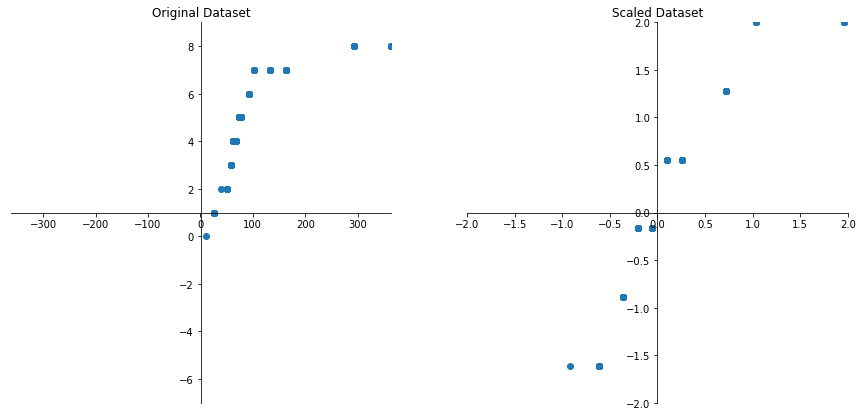

In [30]:
# Plotting Original Data Vs. Scaled Data
# Conclusion: Since the scaled data is not showing better curve we will go with our original data for our dataset.

fig1 = plt.figure(figsize=(15, 7))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Dataset")
axes2.set_title("Scaled Dataset")

maxx = X_train["Fine_Amount"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Fine_Amount"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:]) 

plt.savefig("../imgs/Original_vs_Scaled.png",bbox_inches='tight')


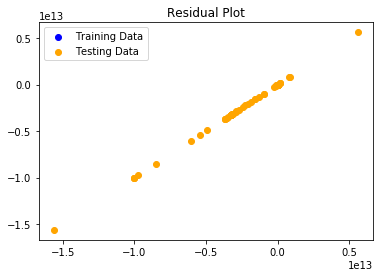

In [31]:
# Defining the Model using scaled data
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model to training data
model.fit(X_train_scaled, y_train_scaled)

# Plot the results 
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.savefig("../imgs/Scaled_ResidualPlot.png",bbox_inches='tight')
plt.show()

In [32]:
# Quantify the model using scaled data

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}") 
# For 10K  : MSE: 5.231363155118241e+24, R2: -5.349574732432915e+24
# For 100K : MSE: 2.2846531476641436e+25, R2: -2.2627489155412134e+25
# For 200K : MSE: 9.444270954625202e+23, R2: -9.459198898462764e+23 
# For 500K : MSE: 3.3327266949906473e+22, R2: -3.3494385209052305e+22

MSE: 4.7008518657327596e+23, R2: -4.761323999678819e+23


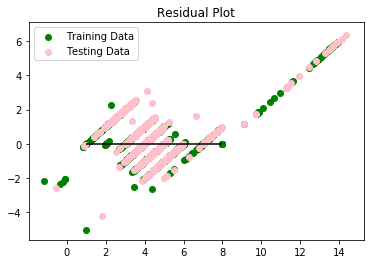

In [7]:
# Defining the Model using original dataset
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model to training data
model.fit(X_train, y_train)

# Plot the results 
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="green", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="pink", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.savefig("../imgs/ResidualPlot.png",bbox_inches='tight')
plt.show()

In [8]:
# Quantify the model using original dataset

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"For original dataset MSE: {MSE}, R2: {r2}") 


# For  10K : For original dataset MSE: 0.7856541054826144, R2: 0.574420483883838
# For 100K : For original dataset MSE: 4.138585079957473e+16, R2: -2.17935748720676e+16
# For 200K : For original dataset MSE: 54652818984716.984, R2: -28832627577394.305
# For 500K : For original dataset MSE: 117466160175206.25, R2: -62393824151098.47


For original dataset MSE: 0.7850452882243407, R2: 0.5829670269168574


In [11]:
df1 =pd.DataFrame({"Prediction": predictions.flatten(), "Actual": y_test.flatten() })

In [12]:
df1.head()

,Prediction,Actual
0,3.958865,4
1,4.162611,4
2,4.952776,5
3,4.153161,4
4,4.439991,5


In [13]:
# Checking the accuracy of model for sample data

from sklearn.metrics import explained_variance_score
y_true = [4, 4, 5, 4,5]
y_pred = [3.958865,4.162611,4.952776,4.153161,4.439991]
explained_variance_score(y_true, y_pred)  

0.712242596766

In [37]:
RawData ={"FineRange":['10-20', '21-30', '31-50', '51-60', '61-70','71-80', '81-100', '101-250','251-505'],
          "Catagory" :[0, 1, 2, 3, 4, 5, 6, 7, 8 ] }
df_FineRange = pd.DataFrame(RawData, columns = ["FineRange","Catagory"])
df_FineRange


,FineRange,Catagory
0,10-20,0
1,21-30,1
2,31-50,2
3,51-60,3
4,61-70,4
5,71-80,5
6,81-100,6
7,101-250,7
8,251-505,8


In [38]:
print("\nLet's looks at sample prediction below data:")
lc=1003   # 2967
pc_dataset.loc[lc]


Let's looks at sample prediction below data:


Color             GY
Make            FORD
Route          00400
Fine_Amount       68
Binned             4
Name: 1003, dtype: object

In [39]:
print("X_test data for this row is :")
X_test.loc[[lc]]

X_test data for this row is :


,Fine_Amount,Color_BE,Color_BG,Color_BK,Color_BL,Color_BN,Color_BR,Color_BU,Color_CO,Color_GN,...,Route_BEV,Route_FTHL,Route_M29,Route_MQ,Route_MQ111,Route_MQ88,Route_PAT,Route_PT,Route_TE,Route_WIL
1003,68.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Now let's predict for this value.
p = model.predict(X_test.loc[lc].values.reshape(1,-1))
print("Predicted Fine_Amount: ", p)
p=int(np.asarray(p))
print("Predicted Fine Amount Range below: ")
df_FineRange.iloc[p]

Predicted Fine_Amount:  [[4.16261074]]
Predicted Fine Amount Range below: 


FineRange    61-70
Catagory         4
Name: 4, dtype: object

In [41]:
score = model.score(X_test, y_test)
print("You are correct this much % of times (Score): ", score) 

# for 10K : You are correct this much % of times (Score):  0.574420483883838
# For 200K: You are correct this much % of times (Score):  -2.17935748720676e+16


You are correct this much % of times (Score):  0.5829670269168574


In [47]:
# Save Model Using Pickle
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle

# Save the model to disk
filename = '../imgs/PC_Finalized_Model.sav'
pickle.dump(model, open(filename, 'wb'))
 

In [49]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.5829670269168574


In [50]:
loaded_model.score(X_test, y_test)
print(loaded_model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [42]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train, y_train)

predictions = lasso.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = lasso.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

# For 10K  : MSE: 0.806681734793876, R2: 0.563030066338881
# For 100K : MSE: 0.8326234133839682, R2: 0.5615448190808616
# For 200K : MSE: 0.8639828010344125, R2: 0.5441974485805374
# For 500K : MSE: 0.8625997859021498, R2: 0.54181783694914


MSE: 0.8208012143597246, R2: 0.5639727084931294


In [43]:
scoreLasso = model.score(X_test, y_test)
print(" (Score): ", scoreLasso) 

# You are correct this much % of times (Score):  0.574420483883838

 (Score):  0.5829670269168574


In [44]:
# Ridge model 
# Less Overfitting possibility
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train, y_train)

predictions = ridge.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = ridge.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")
# For 10K  : MSE: 0.785030025209202, R2: 0.5747585407703522
# For 100K : MSE: 0.7355864690647247, R2: 0.6126439718231756
# For 200K : MSE: 0.7476993706076469, R2: 0.6055439061869502
# For 500K : MSE: 0.7444829187495298, R2: 0.6045572933798857


MSE: 0.7846606738054929, R2: 0.5831713423837339


In [45]:
scoreRidge= model.score(X_test, y_test)
print(" (Score): ", scoreRidge) 

# You are correct this much % of times (Score):  0.574420483883838

 (Score):  0.5829670269168574


In [46]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

predictions = elasticnet.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = elasticnet.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")
# For 10K : MSE: 0.8003615147002069, R2: 0.5664536546463068
# For 100K: MSE: 0.8285549499186874, R2: 0.5636872508886372
# For 200K: MSE: 0.8595825850371509, R2: 0.5465188254365898
# For 500K: MSE: 0.8578871105007005, R2: 0.5443210416154087


MSE: 0.8124092789763435, R2: 0.5684306853963077


In [99]:
df_en =pd.DataFrame({"Prediction": predictions.flatten(), "Actual": y_test.flatten() })

In [100]:
df_en.head()

,Prediction,Actual
0,4.064232,4
1,3.873550,3
2,4.405750,5
3,4.397616,5
4,3.919118,3


In [101]:
print("Sample X_test Fine_Amount: ", X_test["Fine_Amount"].iloc[0])
p = model.predict(X_test.iloc[0].values.reshape(1,-1))
print("Predicted Value : ", p)
p=int(np.asarray(p))
print("\nPredicted Fine Amount Range for Citation:", df_FineRange.iloc[p])


Sample X_test Fine_Amount:  63.0
Predicted Value :  [[3.68860634]]

Predicted Fine Amount Range for Citation: FineRange    51-60
Catagory         3
Name: 3, dtype: object
